# Applications

Here, I am working up a few probabilistic applications of the ideas for the paper on the Age Area Hypothesis. The first application is to the Semetic language group, while the second is to the Turkic language group.

In [1]:
import copy
import os
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import random

if os.path.exists('C:\\Users\\matth\\'):
    os.environ['PROJ_LIB'] = 'C:\\Users\\matth\\Anaconda3\\pkgs\\basemap-1.2.1-py37h79c95a4_1\\Library\\share\\basemap'

from IPython.display import Image
from mpl_toolkits.basemap import Basemap
from adjustText import adjust_text
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

start_dir = os.getcwd()
python_dir = pathlib.Path(os.getcwd()).parts[:-1] + ('Python',)
os.chdir(pathlib.Path(*python_dir))

from PyInstEvo import *

os.chdir(start_dir)
os.chdir('..')

pd.set_option('display.width', 1000)
np.set_printoptions(linewidth=120)

%matplotlib inline

# Setting up the Basic Tree

We first call our method for initiating a blank tree. 

In [2]:
SemiticTree = PhyloTree(DFill(), 'Semitic Tree')

We will try and fill in a tree with the basic details of the following Tree, as estimated in the paper. Our approach is to just get a Tree in there that carries the basic structure of the tree below, and then tune it using maximum likelihood so all of the splits and extinction times are approximately correct.

Here is the tree:

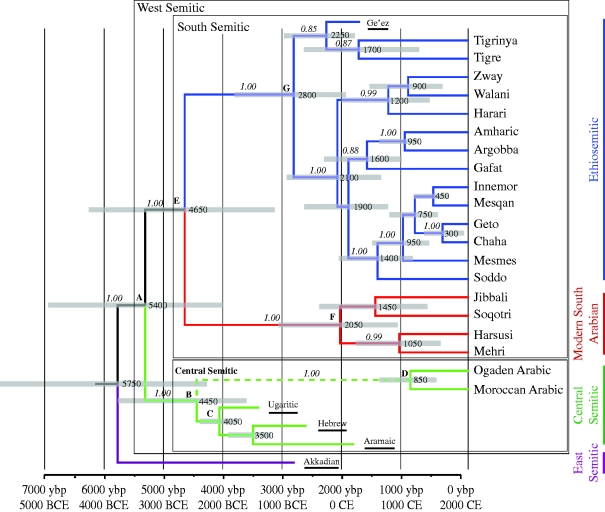

In [3]:
file = os.getcwd() + '\\SavedFigures\\rspb20090408fig2.jpg'
Image(filename = file)

In [4]:
names = ['Ge`ez', 'Tigrinya', 'Tigre', 'Zway', 'Walani', 'Harari', 'Amharic', 'Argobba', 'Gafat',
         'Innemor', 'Mesqan', 'Geto', 'Chaha', 'Mesmes', 'Soddo', 'Jibbali', 'Soqotri',
         'Harsusi', 'Mehri', 'Ogaden Arabic', 'Moroccan Arabic', 'Ugaritic', 'Hebrew', 'Aramaic', 'Akkadian']

names_to_add = []
for name in names:
    names_to_add.append([name])

Next, we can add in the current day location of each people. We can get these from the Ethnographic Atlas or by just looking them up. Coordinates are longitude, then latitude:

In [5]:
locs = {'Ge`ez': [41., 12.94], 'Tigrinya': [39., 14.], 'Tigre': [39., 17.],
        'Zway': [38.72, 7.93], 'Walani': [36.5, 6.5], 'Harari': [36.4, 9.65],
        'Amharic': [39.2, 12.5], 'Argobba': [38.72, 10.67], 'Gafat': [37, 12.2],
        'Innemor': [36.67, 8.33], 'Mesqan': [38.38, 8.12], 'Geto': [39.2, 8.2], 
        'Chaha': [39.6, 8.9], 'Mesmes': [37.1, 7.5], 'Soddo': [42.85, 6.6],
        'Jibbali': [54.84, 17.27], 'Soqotri': [53.77, 12.55],
        'Harsusi': [55.9, 19.91], 'Mehri':[51.66, 17.06], 
        'Ogaden Arabic':[44.58, 7.39], 'Moroccan Arabic':[-6.93, 32.64],
        'Ugaritic': [35.79, 35.60], 'Hebrew':[34.88, 31.66], 'Aramaic': [40.08, 36.30],
        'Akkadian':[46.5, 32.05] }

lats = []
lons = []
for item in locs:
    lons.append(locs[item][0])
    lats.append(locs[item][1])

Fill in the name attribute of the Tree:

In [6]:
SemiticTree.name = np.matrix(names_to_add)

In [7]:
plt.scatter(lons, lats)
mplleaflet.display()

C:\Users\matth\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Which looks about right. Let's add in the distances and then compute the pairwise great circle distance matrix:

In [8]:
SemiticTree.lat = np.array(lats)
SemiticTree.lon = np.array(lons)
SemiticTree.D = gcircledist(SemiticTree.lat, SemiticTree.lon)

Here is a tree written as a nested panel structure. 

Following the nested tree structure is the matrix of of extinction times, where a zero marks a language that has failed to make it to the present time. The number following the zero controls how far the branch should be rolled back. 

The final matrix gives the approximate date at which the language became extinct. I believe these are in writting in terms of the Common Era timing, not before present. 

In [9]:
TMat = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6],
        [0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 8, 9],
        [0, 1, 2, 3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 9, 9, 10, 11, 12, 13],
        [0, 1, 2, 3, 4, 5, 6, 6, 7, 8, 8, 8, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]

DMat = [[0, .4], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], 
        [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], 
        [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [0, .1], [0, .1], [0, .1], [0, .1]]

DeData = [[200, 25], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50],
          [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [-1200, 25], [-600, 25], [-200, 25], [-800, 25]]

Add in each of these attributes to the tree:

In [10]:
SemiticTree.BaseTree = np.matrix(TMat).transpose()
SemiticTree.deathmat = np.matrix(DMat)
SemiticTree.deathdata = np.matrix(DeData)
SemiticTree.states = np.matrix(np.zeros((25, 400)))

Now, we take our base tree and formally declare it to be a "ResolvedTree," which means each of the linguistic groupings are bilateral splits. 

In [11]:
STR = ResolvedTree(SemiticTree, 'Semitic Tree')

Initiating from basic tree with user-provide matrices.


Here is a picture of the nested panel structure. More colors mean more panels, so one can see how the Tree "grows" as we move left to right.

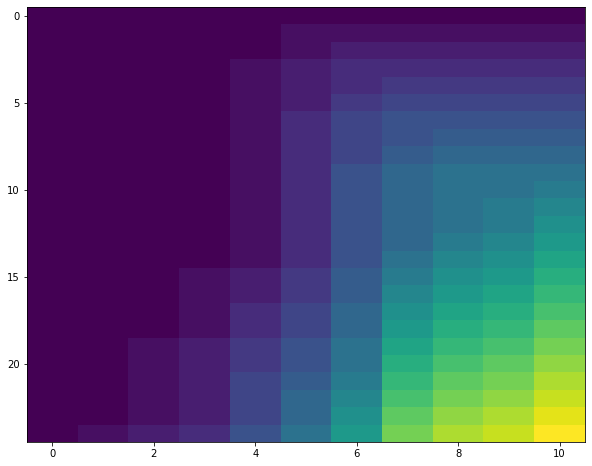

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(STR.resolvedtree, aspect='auto')

Here we can unpack aspects of the tree, with the aim in mind of seeing how many parameters we need to set the whole tree. We need parameters for each branch, parameters for each extinction, etc. We can take a look at these using the

In [13]:
numbranches = STR.interiorbranches                                        
bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)
rInit       = np.zeros((1, len(STR.words)))                         
dparms      = np.sum(STR.deathmat[:,0] == 0)                        
dInit       = np.zeros((1, dparms)) + 1                                     
eInit       = np.matrix(5)                                                  
parmsInit   = np.hstack((bInit, rInit, dInit, eInit)) 

An alternative way of setting branches that seems to give a visually-pleasing initial tree...

In [14]:
bInit = np.ones((1, numbranches))*(-3)

To be clear, in the above, the branch parameters are given in `bInit`, while the `rInit` pertain to the rate changes for words. The dparms are the parameters that do the "back" correction for the matrix, while the eInit parameter is the overall depth of the tree. 

Here is a list of all the parameter values. Normally, we would also have rate parameters for the rate of linguistic change, but we don't need these for our purposes. 

In [15]:
STP = ParameterizedTree(SemiticTree, 'test', parmsInit)
STP.showparameters()

Initiating from basic tree with user-provide matrices.
Branch parameters:     [[-1.         -1.01811594 -1.03623188 -1.05434783 -1.07246377 -1.09057971 -1.10869565 -1.12681159 -1.14492754
  -1.16304348 -1.18115942 -1.19927536 -1.2173913  -1.23550725 -1.25362319 -1.27173913 -1.28985507 -1.30797101
  -1.32608696 -1.3442029  -1.36231884 -1.38043478 -1.39855072 -1.41666667]]
Rate parameters (ln):  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
Death parameters:      [[1. 1. 1. 1. 1.]]
Overall depth parms:   5.0



Inserting time splits derived from the paper before we go any further. 

**Note: we learned the hard way that these have to be complete, otherwise we wind up with flat spots in the tree! This means that all the numbers in the tree we are copying have to find their way into this list somehow!**

We have:

In [16]:
splits = pd.DataFrame([['Semetic', 'Akkadian', 'Aramaic',  5750, 25],
                       ['Semetic', 'Akkadian', 'Tigrinya', 5750, 25],
                       ['Semetic', 'Ge`ez', 'Tigrinya',     2250, 25],
                       ['Semetic', 'Tigrinya', 'Tigre',    1700, 25], 
                       ['Semetic', 'Zway', 'Walani',        900, 25],
                       ['Semetic', 'Harari', 'Walani',     1200, 25],
                       ['Semetic', 'Amharic', 'Argobba',    950, 25],
                       ['Semetic', 'Amharic', 'Gafat',     1600, 25],
                       ['Semetic', 'Innemor', 'Mesqan',     450, 25],
                       ['Semetic', 'Geto', 'Chaha',         300, 25],
                       ['Semetic', 'Innemor', 'Geto',       750, 25],
                       ['Semetic', 'Tigrinya', 'Chaha',               2800, 25],
                       ['Semetic', 'Jibbali', 'Soqotri',              1450, 25],
                       ['Semetic', 'Mehri', 'Walani',                 4650, 25],
                       ['Semetic', 'Harsusi', 'Mehri',                1050, 25],
                       ['Semetic', 'Ogaden Arabic', 'Moroccan Arabic', 850, 25],
                       ['Semetic', 'Ugaritic', 'Hebrew',              4050, 25],
                       ['Semetic', 'Hebrew', 'Tigrinya',              5400, 25],
                       ['Semetic', 'Hebrew', 'Aramaic',               3500, 25],
                       ['Semetic', 'Moroccan Arabic', 'Aramaic',      4450, 25],
                       ['Semetic', 'Soqotri', 'Harsusi',              2050, 25],
                       ['Semetic', 'Soddo', 'Innemor',                1400, 25],
                       ['Semetic', 'Mesmes', 'Chaha',                  950, 25],
                       ['Semetic', 'Soddo', 'Gafat',                  1900, 25],
                       ['Semetic', 'Soddo', 'Walani',                 2100, 25]])

In [17]:
STP.splitinfo(splits)
STP.priordepth(7.2, 6.2)
STP.settimes()

The following is a parameterized tree that fairly closely approximates the tree in the above-mentioned article. We can actualy calculate its likelihood as constructed, using the split times and the extinction times... 

-6799.948091822845 -585.3216492840306


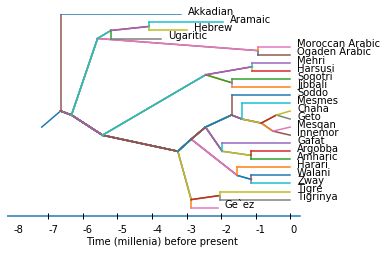

In [18]:
btouse = np.matrix([[-.4, .1, -.399, -.34, -1.54, -1.01, -1.4, -.814, -0.914, -.14, -1.78, -1.3, -2, 
                     -2, -.8, .21, 1.6, -2.6, 
                     -.4, .2, -1.8, -2, -3, -2.5]])
# In reverse order:
# First is root length
# Second is Akkadian Split
# Break up of Arabic - the (-2.6) is the breakup of Aramaic, Hebrew and Ugaritic
# (-2) IS THE breakup of the soddo-geez group
# (-1.78 is the breakup of soddo-amharic group)
# -0.914 is the Tigre-Tigrinya split
# -1.01 is the Walani-Zway split
# -2.54 is the mesmes-innemor breakup
# -3.9999 is the Chat Geto Mesqan Innemor breakup

dtouse = np.matrix([[1, .95, 1, -.1, -.10]])

STP.bparms = btouse
STP.dparms = dtouse
STP.settimes()
print(STP.SplitLikelihood(), STP.DeathLikelihood())
ax =STP.showtree()

# Tuning to match another Tree - Formal Method

Here, we use a simple algorithm to tune the branch parameters so that we get a closer match. 

So, an MCMC algorithm will propose changes to each parameter, and then compare log likelihoods so as to take the one that matches things best. Anyways, we can modify our MCMC algorithm as follows - I will use a mwg sampler first, as the extension to a global sampler isn't that bad. 

One thing to be careful about - you want initialization to note use old things that might be hanging around!

In [19]:
numbranches = STP.interiorbranches

bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)
rInit       = np.zeros((1, len(STR.words)))                         
dparms      = np.sum(STR.deathmat[:,0] == 0)                        
dInit       = np.zeros((1, dparms)) + 1                                     
eInit       = np.matrix(0)                                                  
parmsInit   = np.hstack((bInit, rInit, dInit, eInit))

In [20]:
Told = ParameterizedTree(SemiticTree, 'mcmc', parmsInit)
Told.splitinfo(splits)
Told.priordepth(6, 5)
Told.settimes()

Initiating from basic tree with user-provide matrices.


In [21]:
draws  = 200
damper = .5
aopt   = .25

rf = 0.01

xold = np.hstack((bInit, dInit, eInit))              # Complete vector of parameters
nb    = np.shape(xold)[1]                     # Number of parameters
bdim  = np.shape(bInit)[1]                     # Break point between branch and death parameters

lam   = 2.38**2 / nb*np.ones((1, nb))           # adaptation parameter
 
val = []                                       # holder for likelihood
Accept = np.zeros((1, nb))                     # Acceptances
alpha  = np.zeros((1, nb))                     # alpha probability of acceptance
xs     = []                                    # place older for parameter values
mu     = np.array(xold).flatten()             # mean of proposal distribution (not needed for this routine)

Vinit = np.eye(nb)                             # Initial variance for proposals

old = Told.SplitLikelihood() + Told.DeathLikelihood() - rf*np.sum(np.square(xold))
print(old)

-23546.649741987636


Initial values of the Tree in terms of likelihood:

In [22]:
Told.SplitLikelihood(), Told.DeathLikelihood()

(-19025.730946195967, -4520.514604970411)

### Basic MCMC algorithm 

This algorithm proposes changes and accepts them if the likelihood is higher, to get a tighter fit between my tree and the one in the article.

In [23]:
for i in np.arange(draws):
    accept = np.zeros((1, nb))
    
    for j in range(nb):
        Tnew = copy.deepcopy(Told)
        xnew = copy.deepcopy(xold)
        xnew[0, j] = xold[0, j] + multivariate_normal.rvs(0)*np.sqrt(Vinit[j, j])*lam[0, j]
        bParms = xnew[:, 0:bdim]
        dParms = xnew[:, bdim:-1]
        eParms = xnew[:, -1][0, 0]
        
        Tnew.bparms = bParms
        Tnew.dparms = dParms
        Tnew.eparms = eParms
        Tnew.settimes()        
        
        pro    = Tnew.SplitLikelihood() + Tnew.DeathLikelihood() - rf*np.sum(np.square(xnew))
     
        if np.isnan(xnew[0, j]):
            alpha[0, j] = 0
        elif pro > old:
            alpha[0, j] = 1
        else:
            alpha[0, j] = np.exp(pro - old)
            
        if np.random.uniform(0, 1) < alpha[0, j]:
            old = pro
            xold = xnew[:]
            accept[0, j] = 1
            Told = copy.deepcopy(Tnew)
        
        if np.random.uniform(0, 1) > .999:
            print(i, old)
    
    xs.append(xold)        
    val.append(old)
    lam = lam*np.exp(1/(i + 1)**damper*(alpha - aopt))
    Accept = np.vstack((Accept, accept))

75 -65.92845887235555
172 -46.24534866755643
191 -39.591873785721695


In [24]:
Told.DeathLikelihood(), Told.SplitLikelihood(), rf*np.sum(np.square(xold))

(-5.895852040856388, -38.10479403253964, 1.0894291834276582)

The associated tree after the algorithm has run:

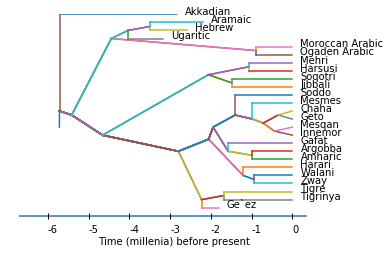

In [25]:
Told.showtree()
plt.savefig('SemiticTree.eps')

In [26]:
Told.showparameters()

Branch parameters:     [[-0.45978984  0.05384526 -1.00249107 -0.53057946 -0.83706729 -1.22053193 -1.45348049 -0.95049994 -1.13914183
  -0.36107859 -2.88219019 -1.85748405 -1.36304697 -1.01586591 -0.95590746 -0.05451378  1.39369254 -2.28847582
  -0.40782652  0.22943068 -1.81347755 -1.5200389  -2.89701524 -7.59762818]]
Rate parameters (ln):  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
Death parameters:      [[ 1.46296909  1.31912579  1.04241272  0.53051814 -0.01919743]]
Overall depth parms:   0.9384177637568775



In [27]:
vals_poi = OriginLikelihood_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D, 
                            Told.filledtimeFractions, usetimes=False, distances=False)

In [28]:
vals_exp = OriginLikelihood_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D,
                            Told.filledtimeFractions, usetimes=True, distances=True)

In [29]:
vals_dyen = DyenDist_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D,
                       Told.filledtimeFractions, distances=False, usetimes=False)

In [30]:
vals_dexp = DyenDist_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D,
                       Told.filledtimeFractions, distances=True, usetimes=True)

In [31]:
exp_prob = np.exp(vals_exp) / np.sum(np.exp(vals_exp))
poi_prob = np.exp(vals_poi) / np.sum(np.exp(vals_poi))

In [32]:
Names = [item[0] for item in Told.name.tolist()]

In [33]:
MatResults = np.array( (Names, np.round(vals_dyen, 1), np.round(vals_dexp, 1), np.round(poi_prob, 3), np.round(exp_prob, 3)) )

In [34]:
MatResults = MatResults.T

In [35]:
MatResults

array([['Ge`ez', '-24.9', '-105.7', '0.004', '0.045'],
       ['Tigrinya', '-26.4', '-105.8', '0.001', '0.042'],
       ['Tigre', '-26.4', '-107.3', '0.001', '0.01'],
       ['Zway', '-29.6', '-107.4', '0.0', '0.009'],
       ['Walani', '-28.1', '-108.6', '0.0', '0.003'],
       ['Harari', '-25.1', '-106.9', '0.002', '0.014'],
       ['Amharic', '-26.5', '-106.5', '0.0', '0.021'],
       ['Argobba', '-26.5', '-106.6', '0.0', '0.02'],
       ['Gafat', '-25.4', '-106.0', '0.001', '0.033'],
       ['Innemor', '-28.5', '-109.2', '0.0', '0.001'],
       ['Mesqan', '-30.0', '-107.7', '0.0', '0.007'],
       ['Geto', '-30.0', '-108.1', '0.0', '0.004'],
       ['Chaha', '-28.5', '-109.2', '0.0', '0.001'],
       ['Mesmes', '-27.1', '-108.0', '0.0', '0.005'],
       ['Soddo', '-25.5', '-106.8', '0.0', '0.016'],
       ['Jibbali', '-24.6', '-106.0', '0.013', '0.034'],
       ['Soqotri', '-24.6', '-106.4', '0.013', '0.023'],
       ['Harsusi', '-24.6', '-106.2', '0.013', '0.03'],
       ['Mehri',

In [36]:
np.savetxt('SemiticResults.csv', MatResults, delimiter='&', newline='\\\\\n', fmt='%s')

# Graphs of Origin Probabilities

In [37]:
v = exp_prob*10

C:\Users\matth\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


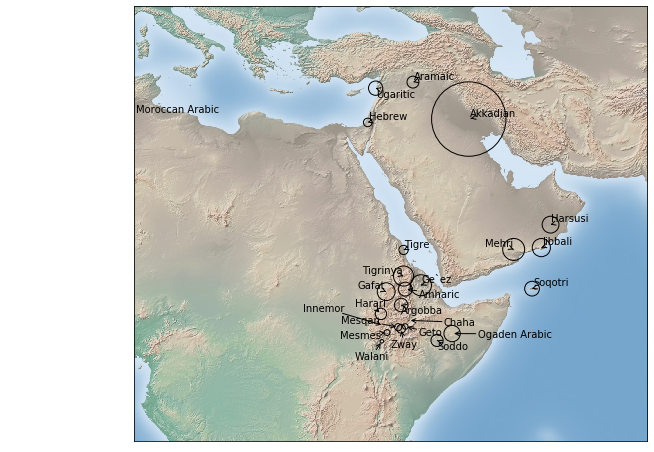

In [38]:
y = np.asarray(Told.lat.astype(float)).flatten().tolist()
x = np.asarray(Told.lon.astype(float)).flatten().tolist()
     
Order=np.asarray(Told.resolvedtree[:,-1]).astype(int).flatten()

y = [y[i] for i in Order]
x = [x[i] for i in Order]
        
name = np.asarray(Told.name).flatten().tolist()

s = [1000*n for n in v-np.min(v)]
    
myfig = plt.figure(figsize=(10, 8))
    
h = 3000
    
m = Basemap(llcrnrlon=8, llcrnrlat=-5,urcrnrlon=67,urcrnrlat=45, resolution='l')
#m.drawlsmask()
#m.drawcoastlines()
#m.fillcontinents(color='lightgray', zorder=0)
m.shadedrelief()
  
#m.scatter(x, y, s=s, c=s, cmap='Reds', linewidths=1, latlon=True)
m.scatter(x, y, s=s, edgecolors='black', linewidths=1, facecolors='none')

xpt, ypt = m(x, y)

texts = [plt.text(xpt[i], ypt[i], name[i], ha='center', va='top') for i in range(len(name))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

myfig.show()

plt.savefig('Semiticmap.eps')

# Including Eblaite  

If we introduced another branch of the tree to reflect Elbian, how would this change things? To do so, we will create a new tree that looks like:


In [62]:
names = ['Ge`ez', 'Tigrinya', 'Tigre', 'Zway', 'Walani', 'Harari', 'Amharic', 'Argobba', 'Gafat',
         'Innemor', 'Mesqan', 'Geto', 'Chaha', 'Mesmes', 'Soddo', 'Jibbali', 'Soqotri',
         'Harsusi', 'Mehri', 'Ogaden Arabic', 'Moroccan Arabic', 'Ugaritic', 'Hebrew', 'Aramaic', 'Eblaite' ,
         'Akkadian']

names_to_add = []
for name in names:
    names_to_add.append([name])

Next, we can add in the current day location of each people. We can get these from the Ethnographic Atlas or by just looking them up. Coordinates are longitude, then latitude:

In [63]:
locs = {'Ge`ez': [41., 12.94], 'Tigrinya': [39., 14.], 'Tigre': [39., 17.],
        'Zway': [38.72, 7.93], 'Walani': [36.5, 6.5], 'Harari': [36.4, 9.65],
        'Amharic': [39.2, 12.5], 'Argobba': [38.72, 10.67], 'Gafat': [37, 12.2],
        'Innemor': [36.67, 8.33], 'Mesqan': [38.38, 8.12], 'Geto': [39.2, 8.2], 
        'Chaha': [39.6, 8.9], 'Mesmes': [37.1, 7.5], 'Soddo': [42.85, 6.6],
        'Jibbali': [54.84, 17.27], 'Soqotri': [53.77, 12.55],
        'Harsusi': [55.9, 19.91], 'Mehri':[51.66, 17.06], 
        'Ogaden Arabic':[44.58, 7.39], 'Moroccan Arabic':[-6.93, 32.64],
        'Ugaritic': [35.79, 35.60], 'Hebrew':[34.88, 31.66], 'Aramaic': [40.08, 36.30],
        'Eblaite':[36.970, 35.778], 'Akkadian':[46.5, 32.05]}

lats = []
lons = []
for item in locs:
    lons.append(locs[item][0])
    lats.append(locs[item][1])

Fill in the name attribute of the Tree:

In [64]:
SemiticTree.name = np.matrix(names_to_add)

In [65]:
plt.scatter(lons, lats)
mplleaflet.display()

Which looks about right. Let's add in the distances and then compute the pairwise great circle distance matrix:

In [66]:
SemiticTree.lat = np.array(lats)
SemiticTree.lon = np.array(lons)
SemiticTree.D = gcircledist(SemiticTree.lat, SemiticTree.lon)

We shall here insert a flag for where we want Eblaite to be. In the first case, we include it with Akkadian as a member of the "East Semetic Group"

In [67]:
flag = 'nw'

if flag == 'es':
    TMat = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 7],
        [0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 8, 9, 10],
        [0, 1, 2, 3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 9, 9, 10, 11, 12, 13, 14],
        [0, 1, 2, 3, 4, 5, 6, 6, 7, 8, 8, 8, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]]
else:
    TMat = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 7],
        [0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 8, 9, 10],
        [0, 1, 2, 3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 9, 9, 10, 11, 12, 13, 14],
        [0, 1, 2, 3, 4, 5, 6, 6, 7, 8, 8, 8, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]]    
    

DMat = [[0, .4], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], 
        [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], 
        [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [0, .1], [0, .1], [0, .1], [0, .1], [0, .1]]

DeData = [[200, 25], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50],
          [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [-1200, 25], [-600, 25], [-200, 25], [-2000, 25], [-800, 25]]

In [68]:
SemiticTree.BaseTree = np.matrix(TMat).transpose()
SemiticTree.deathmat = np.matrix(DMat)
SemiticTree.deathdata = np.matrix(DeData)
SemiticTree.states = np.matrix(np.zeros((26, 400)))

In [69]:
STR = ResolvedTree(SemiticTree, 'Semitic Tree')

Initiating from basic tree with user-provide matrices.


Now, we take our base tree and formally declare it to be a "ResolvedTree," which means each of the linguistic groupings are bilateral splits. 

In [70]:
numbranches = STR.interiorbranches                                        
bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)
rInit       = np.zeros((1, len(STR.words)))                         
dparms      = np.sum(STR.deathmat[:,0] == 0)                        
dInit       = np.zeros((1, dparms)) + 1                                     
eInit       = np.matrix(5)                                                  
parmsInit   = np.hstack((bInit, rInit, dInit, eInit)) 

In [71]:
STP = ParameterizedTree(SemiticTree, 'test', parmsInit)
STP.showparameters()

Initiating from basic tree with user-provide matrices.
Branch parameters:     [[-1.         -1.01666667 -1.03333333 -1.05       -1.06666667 -1.08333333 -1.1        -1.11666667 -1.13333333
  -1.15       -1.16666667 -1.18333333 -1.2        -1.21666667 -1.23333333 -1.25       -1.26666667 -1.28333333
  -1.3        -1.31666667 -1.33333333 -1.35       -1.36666667 -1.38333333 -1.4       ]]
Rate parameters (ln):  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
Death parameters:      [[1. 1. 1. 1. 1. 1.]]
Overall depth parms:   5.0



In [72]:
if flag == 'nw':
    splits = pd.DataFrame([['Semetic', 'Akkadian', 'Aramaic',  5750, 25],
                       ['Semetic', 'Eblaite', 'Akkadian', 4500, 25],
                       ['Semetic', 'Akkadian', 'Tigrinya', 5750, 25],
                       ['Semetic', 'Ge`ez', 'Tigrinya',     2250, 25],
                       ['Semetic', 'Tigrinya', 'Tigre',    1700, 25], 
                       ['Semetic', 'Zway', 'Walani',        900, 25],
                       ['Semetic', 'Harari', 'Walani',     1200, 25],
                       ['Semetic', 'Amharic', 'Argobba',    950, 25],
                       ['Semetic', 'Amharic', 'Gafat',     1600, 25],
                       ['Semetic', 'Innemor', 'Mesqan',     450, 25],
                       ['Semetic', 'Geto', 'Chaha',         300, 25],
                       ['Semetic', 'Innemor', 'Geto',       750, 25],
                       ['Semetic', 'Tigrinya', 'Chaha',               2800, 25],
                       ['Semetic', 'Jibbali', 'Soqotri',              1450, 25],
                       ['Semetic', 'Mehri', 'Walani',                 4650, 25],
                       ['Semetic', 'Harsusi', 'Mehri',                1050, 25],
                       ['Semetic', 'Ogaden Arabic', 'Moroccan Arabic', 850, 25],
                       ['Semetic', 'Ugaritic', 'Hebrew',              4050, 25],
                       ['Semetic', 'Hebrew', 'Tigrinya',              5400, 25],
                       ['Semetic', 'Hebrew', 'Aramaic',               3500, 25],
                       ['Semetic', 'Moroccan Arabic', 'Aramaic',      4450, 25],
                       ['Semetic', 'Soqotri', 'Harsusi',              2050, 25],
                       ['Semetic', 'Soddo', 'Innemor',                1400, 25],
                       ['Semetic', 'Mesmes', 'Chaha',                  950, 25],
                       ['Semetic', 'Soddo', 'Gafat',                  1900, 25],
                       ['Semetic', 'Soddo', 'Walani',                 2100, 25]])
else:
    splits = pd.DataFrame([['Semetic', 'Akkadian', 'Aramaic',  5750, 25],
                       ['Semetic', 'Eblaite', 'Tigrinya', 5600, 25],
                       ['Semetic', 'Akkadian', 'Tigrinya', 5750, 25],
                       ['Semetic', 'Ge`ez', 'Tigrinya',     2250, 25],
                       ['Semetic', 'Tigrinya', 'Tigre',    1700, 25], 
                       ['Semetic', 'Zway', 'Walani',        900, 25],
                       ['Semetic', 'Harari', 'Walani',     1200, 25],
                       ['Semetic', 'Amharic', 'Argobba',    950, 25],
                       ['Semetic', 'Amharic', 'Gafat',     1600, 25],
                       ['Semetic', 'Innemor', 'Mesqan',     450, 25],
                       ['Semetic', 'Geto', 'Chaha',         300, 25],
                       ['Semetic', 'Innemor', 'Geto',       750, 25],
                       ['Semetic', 'Tigrinya', 'Chaha',               2800, 25],
                       ['Semetic', 'Jibbali', 'Soqotri',              1450, 25],
                       ['Semetic', 'Mehri', 'Walani',                 4650, 25],
                       ['Semetic', 'Harsusi', 'Mehri',                1050, 25],
                       ['Semetic', 'Ogaden Arabic', 'Moroccan Arabic', 850, 25],
                       ['Semetic', 'Ugaritic', 'Hebrew',              4050, 25],
                       ['Semetic', 'Hebrew', 'Tigrinya',              5400, 25],
                       ['Semetic', 'Hebrew', 'Aramaic',               3500, 25],
                       ['Semetic', 'Moroccan Arabic', 'Aramaic',      4450, 25],
                       ['Semetic', 'Soqotri', 'Harsusi',              2050, 25],
                       ['Semetic', 'Soddo', 'Innemor',                1400, 25],
                       ['Semetic', 'Mesmes', 'Chaha',                  950, 25],
                       ['Semetic', 'Soddo', 'Gafat',                  1900, 25],
                       ['Semetic', 'Soddo', 'Walani',                 2100, 25]])    

In [73]:
STP.splitinfo(splits)
STP.priordepth(7.2, 6.2)
STP.settimes()

The following is a parameterized tree that fairly closely approximates the tree in the above-mentioned article. We can actualy calculate its likelihood as constructed, using the split times and the extinction times... 

-2543.1803951498823 -3227.943569944946


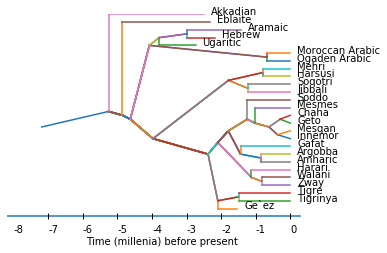

In [74]:
btouse = np.matrix([[-.4, .1, -.399, -.34, -1.54, -1.01, -1.4, -.814, -0.914, -.14, -1.78, -1.3, -2, 
                     -2, -.8, .21, 1.6, -2.6, 
                     -.4, .2, -1.8, -2, -3, -2.5, -1]])
# In reverse order:
# First is root length
# Second is Akkadian Split
# Break up of Arabic - the (-2.6) is the breakup of Aramaic, Hebrew and Ugaritic
# (-2) IS THE breakup of the soddo-geez group
# (-1.78 is the breakup of soddo-amharic group)
# -0.914 is the Tigre-Tigrinya split
# -1.01 is the Walani-Zway split
# -2.54 is the mesmes-innemor breakup
# -3.9999 is the Chat Geto Mesqan Innemor breakup

dtouse = np.matrix([[1, .95, 1, -.1, -.10, -.1]])

STP.bparms = btouse
STP.dparms = dtouse
STP.settimes()
print(STP.SplitLikelihood(), STP.DeathLikelihood())
ax =STP.showtree()

In [75]:
numbranches = STP.interiorbranches

bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)
rInit       = np.zeros((1, len(STR.words)))                         
dparms      = np.sum(STR.deathmat[:,0] == 0)                        
dInit       = np.zeros((1, dparms)) + 1                                     
eInit       = np.matrix(0)                                                  
parmsInit   = np.hstack((bInit, rInit, dInit, eInit))

In [76]:
Told = ParameterizedTree(SemiticTree, 'mcmc', parmsInit)
Told.splitinfo(splits)
Told.priordepth(6, 5)
Told.settimes()

Initiating from basic tree with user-provide matrices.


In [77]:
draws  = 200
damper = .5
aopt   = .25

rf = 0.01

xold = np.hstack((bInit, dInit, eInit))              # Complete vector of parameters
nb    = np.shape(xold)[1]                     # Number of parameters
bdim  = np.shape(bInit)[1]                     # Break point between branch and death parameters

lam   = 2.38**2 / nb*np.ones((1, nb))           # adaptation parameter
 
val = []                                       # holder for likelihood
Accept = np.zeros((1, nb))                     # Acceptances
alpha  = np.zeros((1, nb))                     # alpha probability of acceptance
xs     = []                                    # place older for parameter values
mu     = np.array(xold).flatten()             # mean of proposal distribution (not needed for this routine)

Vinit = np.eye(nb)                             # Initial variance for proposals

old = Told.SplitLikelihood() + Told.DeathLikelihood() - rf*np.sum(np.square(xold))
print(old)

-38428.47823522656


Initial values of the Tree in terms of likelihood:

In [78]:
Told.SplitLikelihood(), Told.DeathLikelihood()

(-29872.44785242279, -8555.606771692661)

### Basic MCMC algorithm 

This algorithm proposes changes and accepts them if the likelihood is higher, to get a tighter fit between my tree and the one in the article.

In [79]:
for i in np.arange(draws):
    accept = np.zeros((1, nb))
    
    for j in range(nb):
        Tnew = copy.deepcopy(Told)
        xnew = copy.deepcopy(xold)
        xnew[0, j] = xold[0, j] + multivariate_normal.rvs(0)*np.sqrt(Vinit[j, j])*lam[0, j]
        bParms = xnew[:, 0:bdim]
        dParms = xnew[:, bdim:-1]
        eParms = xnew[:, -1][0, 0]
        
        Tnew.bparms = bParms
        Tnew.dparms = dParms
        Tnew.eparms = eParms
        Tnew.settimes()        
        
        pro    = Tnew.SplitLikelihood() + Tnew.DeathLikelihood() - rf*np.sum(np.square(xnew))
     
        if np.isnan(xnew[0, j]):
            alpha[0, j] = 0
        elif pro > old:
            alpha[0, j] = 1
        else:
            alpha[0, j] = np.exp(pro - old)
            
        if np.random.uniform(0, 1) < alpha[0, j]:
            old = pro
            xold = xnew[:]
            accept[0, j] = 1
            Told = copy.deepcopy(Tnew)
        
        if np.random.uniform(0, 1) > .999:
            print(i, old)
    
    xs.append(xold)        
    val.append(old)
    lam = lam*np.exp(1/(i + 1)**damper*(alpha - aopt))
    Accept = np.vstack((Accept, accept))

119 -891.932857928663
124 -894.661451323893
129 -897.1107289737794
131 -894.8226847751557
142 -881.0939077978343
146 -885.7426005790722
169 -876.3345469134665


In [80]:
Told.DeathLikelihood(), Told.SplitLikelihood(), rf*np.sum(np.square(xold))

(-7.993811490117783, -870.8400862694323, 3.326596862169629)

The associated tree after the algorithm has run:

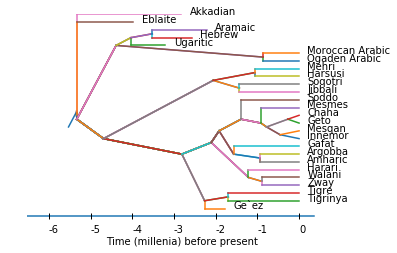

In [81]:
Told.showtree()
plt.savefig('Semitic'+flag+'TreeEb.eps')

In [82]:
if flag =='es':
    vals_poi_es = OriginLikelihood_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D, 
                            Told.filledtimeFractions, usetimes=False, distances=True)
    vals_dyen_es   = vals_dyen = DyenDist_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D,
                       Told.filledtimeFractions, distances=False, usetimes=False)
    vals_poi_es = np.exp(vals_poi_es)/np.sum(np.exp(vals_poi_es))
else:    
    vals_poi_nw = OriginLikelihood_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D, 
                            Told.filledtimeFractions, usetimes=False, distances=True)
    vals_dyen_nw   = vals_dyen = DyenDist_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D,
                       Told.filledtimeFractions, distances=False, usetimes=False)
    vals_poi_nw = np.exp(vals_poi_nw)/np.sum(np.exp(vals_poi_nw))


In [83]:
Names = [item[0] for item in Told.name.tolist()]

In [84]:
MatResults = np.array( (Names, np.round(vals_dyen_es, 1), np.round(vals_poi_es, 3), np.round(vals_dyen_nw, 1),
                        np.round(vals_poi_nw, 3)) )

In [85]:
MatResults = MatResults.T

In [86]:
MatResults

array([['Ge`ez', '-25.6', '0.005', '-26.7', '0.0'],
       ['Tigrinya', '-27.1', '0.001', '-28.2', '0.0'],
       ['Tigre', '-27.1', '0.0', '-28.2', '0.0'],
       ['Zway', '-30.2', '0.0', '-31.4', '0.0'],
       ['Walani', '-28.8', '0.0', '-30.0', '0.0'],
       ['Harari', '-25.8', '0.001', '-27.0', '0.0'],
       ['Amharic', '-27.2', '0.0', '-28.3', '0.0'],
       ['Argobba', '-27.2', '0.0', '-28.3', '0.0'],
       ['Gafat', '-26.1', '0.001', '-27.2', '0.0'],
       ['Innemor', '-29.2', '0.0', '-30.4', '0.0'],
       ['Mesqan', '-30.7', '0.0', '-31.8', '0.0'],
       ['Geto', '-30.7', '0.0', '-31.8', '0.0'],
       ['Chaha', '-29.2', '0.0', '-30.4', '0.0'],
       ['Mesmes', '-27.8', '0.0', '-28.9', '0.0'],
       ['Soddo', '-26.2', '0.0', '-27.4', '0.0'],
       ['Jibbali', '-25.3', '0.006', '-26.5', '0.0'],
       ['Soqotri', '-25.3', '0.005', '-26.5', '0.0'],
       ['Harsusi', '-25.3', '0.005', '-26.5', '0.0'],
       ['Mehri', '-25.3', '0.009', '-26.5', '0.0'],
       ['Ogaden A

In [87]:
np.savetxt('SemiticResultsEb.csv', MatResults, delimiter='&', newline='\\\\\n', fmt='%s')

In [93]:
mapflag = 'nw'

if mapflag == 'es':
    v = np.exp(vals_poi_es)/np.sum(np.exp(vals_poi_es))
else:
    v = np.exp(vals_poi_nw)/np.sum(np.exp(vals_poi_nw))

C:\Users\matth\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


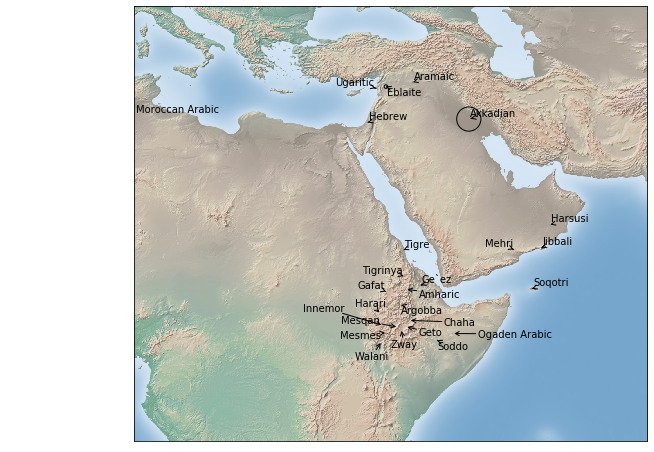

In [94]:
y = np.asarray(Told.lat.astype(float)).flatten().tolist()
x = np.asarray(Told.lon.astype(float)).flatten().tolist()
     
Order=np.asarray(Told.resolvedtree[:,-1]).astype(int).flatten()

y = [y[i] for i in Order]
x = [x[i] for i in Order]
        
name = np.asarray(Told.name).flatten().tolist()

s = [10000*n for n in v-np.min(v)]
    
myfig = plt.figure(figsize=(10, 8))
    
h = 3000
    
m = Basemap(llcrnrlon=8, llcrnrlat=-5,urcrnrlon=67,urcrnrlat=45, resolution='l')
#m.drawlsmask()
#m.drawcoastlines()
#m.fillcontinents(color='lightgray', zorder=0)
m.shadedrelief()
  
#m.scatter(x, y, s=s, c=s, cmap='Reds', linewidths=1, latlon=True)
m.scatter(x, y, s=s, edgecolors='black', linewidths=1, facecolors='none')

xpt, ypt = m(x, y)

texts = [plt.text(xpt[i], ypt[i], name[i], ha='center', va='top') for i in range(len(name))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

myfig.show()

plt.savefig('SemiticmapEb'+mapflag+'.eps')

Making side-by-side figures - best done in Latex?

# Turkic languages

Here, we add in the languages that are Turkic to do that application. A list of names:

In [ ]:
TurkicTree = PhyloTree(DFill(), 'Turkic Tree')

In [ ]:
file = os.getcwd() + '\\SavedFigures\\turktree.jpg'
Image(filename = file)

In [ ]:
names = ['Chuvash', 'Balkar', 'Kumyk', 'Bashkir', 'Kyrgyz', 'Uigur', 'Tatar', 'Karakalpak', 'Kazakh',
         'Uzbek', 'Nogai', 'Khakassian', 'Shor', 'N. Altai', 'S. Altai', 'Yakut', 'Tuvinian',
         'Turkish', 'Gagauz', 'Azeri', 'Turkmen']

names_to_add = []
for name in names:
    names_to_add.append([name])

In [ ]:
TurkicTree.name = np.matrix(names_to_add)

In [ ]:
locs = {'Chuvash': [55.499, 47.122], 'Balkar': [43.343, 43.563], 'Kumyk': [42.976, 47.502],
        'Bashkir': [54.623, 56.312], 'Kyrgyz': [42.875, 74.612], 'Uigur': [45.950, 82.345],
        'Tatar': [55.226, 51.108], 'Karakalpak': [44.186, 58.072], 'Kazakh': [47.321, 66.770],
        'Uzbek': [40.864, 65.246], 'Nogai': [47.261, 40.870], 'Khakassian': [53.705, 91.279], 
        'Shor': [54.933, 87.223], 'N. Altai': [51.166, 87.241], 'S. Altai': [49.881, 88.691],
        'Yakut': [62.000, 129.430], 'Tuvinian': [51.501, 94.360],
        'Turkish': [39.829, 33.296], 'Gagauz':[46.166, 28.743], 
        'Azeri':[40.341, 49.503], 'Turkmen':[37.927, 58.509]}

lats = []
lons = []
for item in locs:
    lats.append(locs[item][0])
    lons.append(locs[item][1])

In [ ]:
plt.scatter(lons, lats)
mplleaflet.display()

In [ ]:
TurkicTree.lat = np.array(lats)
TurkicTree.lon = np.array(lons)
TurkicTree.D = gcircledist(TurkicTree.lat, TurkicTree.lon)

In [ ]:
TMat = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4],
        [0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6],
        [0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8],
        [0, 1, 1, 2, 3, 3, 4, 4, 4, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9],
        [0, 1, 1, 2, 3, 3, 4, 5, 5, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10],
        [0, 1, 1, 2, 3, 3, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

DMat = [[0, .4], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], 
        [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], 
        [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10]]

DeData = [[1990, 25], [np.nan, 50], [np.nan, 50],  
          [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50],
          [np.nan, 50], [np.nan, 50], [np.nan, 50],
          [np.nan, 50], [np.nan, 50], [np.nan, 50],
          [np.nan, 50], [np.nan, 50], [np.nan, 50]]

In [ ]:
TurkicTree.BaseTree = np.matrix(TMat).transpose()
TurkicTree.deathmat = np.matrix(DMat)
TurkicTree.deathdata = np.matrix(DeData)
TurkicTree.states = np.matrix(np.zeros((25, 400)))

In [ ]:
TTR = ResolvedTree(TurkicTree, 'Turkic Tree')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(TTR.resolvedtree, aspect='auto')

In [ ]:
splits = pd.DataFrame([['Turkic', 'Chuvash', 'Turkmen',      1975, 25],
                       ['Turkic', 'Chuvash', 'Balkar',       1975, 25], ## Just redundant with the first?
                       ['Turkic', 'Balkar', 'Kumyk',         875, 25],
                       ['Turkic', 'Bashkir', 'Balkar',       1220, 25], 
                       ['Turkic', 'Bashkir', 'Nogai',        980, 25],
                       ['Turkic', 'Uigur', 'Bashkir',        980, 25],
                       ['Turkic', 'Kyrgyz', 'Uigur',         780, 25],
                       ['Turkic', 'Tatar', 'Karakalpak',     610, 25],
                       ['Turkic', 'Karakalpak', 'Kazakh',    370, 25],
                       ['Turkic', 'Kazakh', 'Uzbek',         370, 25],
                       ['Turkic', 'Uzbek', 'Nogai',          370, 25],
                       ['Turkic', 'Khakassian', 'Balkar',    1570, 25],
                       ['Turkic', 'Khakassian', 'Shor',      920, 25],
                       ['Turkic', 'Khakassian', 'N. Altai' , 1270, 25],
                       ['Turkic', 'N. Altai', 'S. Altai',    720, 25],
                       ['Turkic', 'Yakut', 'Balkar',         1840, 25],
                       ['Turkic', 'Yakut', 'Tuvinian',       850, 25],
                       ['Turkic', 'Turkish', 'Yakut',        1840, 25],
                       ['Semetic', 'Turkish', 'Gagauz',     610, 25],
                       ['Semetic', 'Azeri', 'Turkish',       1270, 25], # Redundant with Turkish/Yakut?
                       ['Semetic', 'Azeri', 'Turkmen',       1100, 25]])

In [ ]:
numbranches = TTR.interiorbranches                                        
bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)
#bInit = np.ones((1, numbranches))*(-3)
rInit       = np.zeros((1, len(TTR.words)))                         
dparms      = np.sum(TTR.deathmat[:,0] == 0)                        
dInit       = np.zeros((1, dparms)) - 10                                     
eInit       = np.matrix(1)                                                  
parmsInit   = np.hstack((bInit, rInit, dInit, eInit)) 

In [ ]:
TTP = ParameterizedTree(TurkicTree, 'test', parmsInit)
TTP.showparameters()

In [ ]:
TTP.splitinfo(splits)
TTP.priordepth(2.1, 1.9)

In [ ]:
TTP.settimes()

In [ ]:
#btouse = np.matrix([[-.4, .1, -.399, -.34, -1.54, -1.01, -1.4, -.814, -0.914, -.14, -1.78, -1.3, -2, 
#                     -2, -.8, .21, 1.6, -2.6, 
#                     -.4, .2, -1.8, -2, -3, -2.5]])
# In reverse order:
# First is root length
# Second is Akkadian Split
# Break up of Arabic - the (-2.6) is the breakup of Aramaic, Hebrew and Ugaritic
# (-2) IS THE breakup of the soddo-geez group
# (-1.78 is the breakup of soddo-amharic group)
# -0.914 is the Tigre-Tigrinya split
# -1.01 is the Walani-Zway split
# -2.54 is the mesmes-innemor breakup
# -3.9999 is the Chat Geto Mesqan Innemor breakup

#dtouse = np.matrix([[1, .95, 1, -.1, -.10]])

#STP.bparms = btouse
#STP.dparms = dtouse
#STP.settimes()
print(TTP.SplitLikelihood(), TTP.DeathLikelihood())
ax = TTP.showtree()

In [ ]:
Told = ParameterizedTree(TurkicTree, 'mcmc', parmsInit)
Told.splitinfo(splits)
Told.priordepth(2.1, 1.9)
Told.settimes()

In [ ]:
draws  = 300
damper = .5
aopt   = .25

rf = .01                                       # Penalty for having large parameters like a ridge

xold = np.hstack((bInit, dInit, eInit))              # Complete vector of parameters
nb    = np.shape(xold)[1]                     # Number of parameters
bdim  = np.shape(bInit)[1]                     # Break point between branch and death parameters

lam   = 2.38**2 / nb*np.ones((1, nb))           # adaptation parameter
 
val = []                                       # holder for likelihood
Accept = np.zeros((1, nb))                     # Acceptances
alpha  = np.zeros((1, nb))                     # alpha probability of acceptance
xs     = []                                    # place older for parameter values
mu     = np.array(xold).flatten()             # mean of proposal distribution (not needed for this routine)

Vinit = np.eye(nb)                             # Initial variance for proposals

old = Told.SplitLikelihood() + Told.DeathLikelihood() - rf*np.sum(np.square(xold))
print(old)

In [ ]:
for i in np.arange(draws):
    accept = np.zeros((1, nb))
    
    for j in range(nb):
        Tnew = copy.deepcopy(Told)
        xnew = copy.deepcopy(xold)
        xnew[0, j] = xold[0, j] + multivariate_normal.rvs(0)*np.sqrt(Vinit[j, j])*lam[0, j]
        bParms = xnew[:, 0:bdim]
        dParms = xnew[:, bdim:-1]
        eParms = xnew[:, -1][0, 0]
        
        Tnew.bparms = bParms
        Tnew.dparms = dParms
        Tnew.eparms = eParms
        Tnew.settimes()        
        
        pro    = Tnew.SplitLikelihood() + Tnew.DeathLikelihood() - rf*np.sum(np.square(xnew))
     
        if np.isnan(xnew[0, j]):
            alpha[0, j] = 0
        elif pro > old:
            alpha[0, j] = 1
        else:
            alpha[0, j] = np.exp(pro - old)
            
        if np.random.uniform(0, 1) < alpha[0, j]:
            old = pro
            xold = xnew[:]
            accept[0, j] = 1
            Told = copy.deepcopy(Tnew)
        
        if np.random.uniform(0, 1) > .999:
            print(i, old)
    
    xs.append(xold)        
    val.append(old)
    lam = lam*np.exp(1/(i + 1)**damper*(alpha - aopt))
    Accept = np.vstack((Accept, accept))

In [ ]:
Told.showtree()
plt.savefig('TurkicTree.eps')


In [ ]:
vals_poi = OriginLikelihood_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D, 
                            Told.filledtimeFractions, usetimes=False, distances=False)

In [ ]:
vals_exp = OriginLikelihood_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D,
                            Told.filledtimeFractions, usetimes=True, distances=True)

In [ ]:
vals_dyen = DyenDist_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D,
                       Told.filledtimeFractions, distances=False, usetimes=False)

In [ ]:
vals_dexp = DyenDist_args(Told.resolvedtree, Told.branchpositions[rows(Told.resolvedtree):], Told.D,
                       Told.filledtimeFractions, distances=True, usetimes=True)

In [ ]:
exp_prob = np.exp(vals_exp) / np.sum(np.exp(vals_exp))
poi_prob = np.exp(vals_poi) / np.sum(np.exp(vals_poi))

In [ ]:
Names = [item[0] for item in Told.name.tolist()]

In [ ]:
MatResults = np.array( (Names, np.round(vals_dyen, 1), np.round(vals_dexp, 1), np.round(poi_prob, 3), np.round(exp_prob, 3)) ).T

In [ ]:
MatResults

In [ ]:
np.savetxt('TurkicResults.csv', MatResults, delimiter='&', newline='\\\\\n', fmt='%s')

In [ ]:
v = exp_prob*10

In [ ]:
y = np.asarray(Told.lat.astype(float)).flatten().tolist()
x = np.asarray(Told.lon.astype(float)).flatten().tolist()
     
Order=np.asarray(Told.resolvedtree[:,-1]).astype(int).flatten()

y = [y[i] for i in Order]
x = [x[i] for i in Order]
        
name = np.asarray(Told.name).flatten().tolist()

s = [1000*n for n in v-np.min(v)]
    
myfig = plt.figure(figsize=(10, 8))
    
h = 3000
    
m = Basemap(llcrnrlon=25, llcrnrlat=27,urcrnrlon=140,urcrnrlat=65, resolution='l')
#m.drawlsmask()
#m.drawcoastlines()
#m.fillcontinents(color='lightgray', zorder=0)
m.shadedrelief()
  
#m.scatter(x, y, s=s, c=s, cmap='Reds', linewidths=1, latlon=True)
m.scatter(x, y, s=s, edgecolors='black', linewidths=1, facecolors='none')

xpt, ypt = m(x, y)

texts = [plt.text(xpt[i], ypt[i], name[i], ha='center', va='top') for i in range(len(name))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

myfig.show()

plt.savefig('Turkicmap.eps')